<a href="https://colab.research.google.com/github/EndarMuh/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Endar Darmawan

Kelas : TI - 3F

Absen : 21

NIM   : 2141720160

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **C. DASAR TEORI**

### **C.1 Konsep Feature Matching**

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

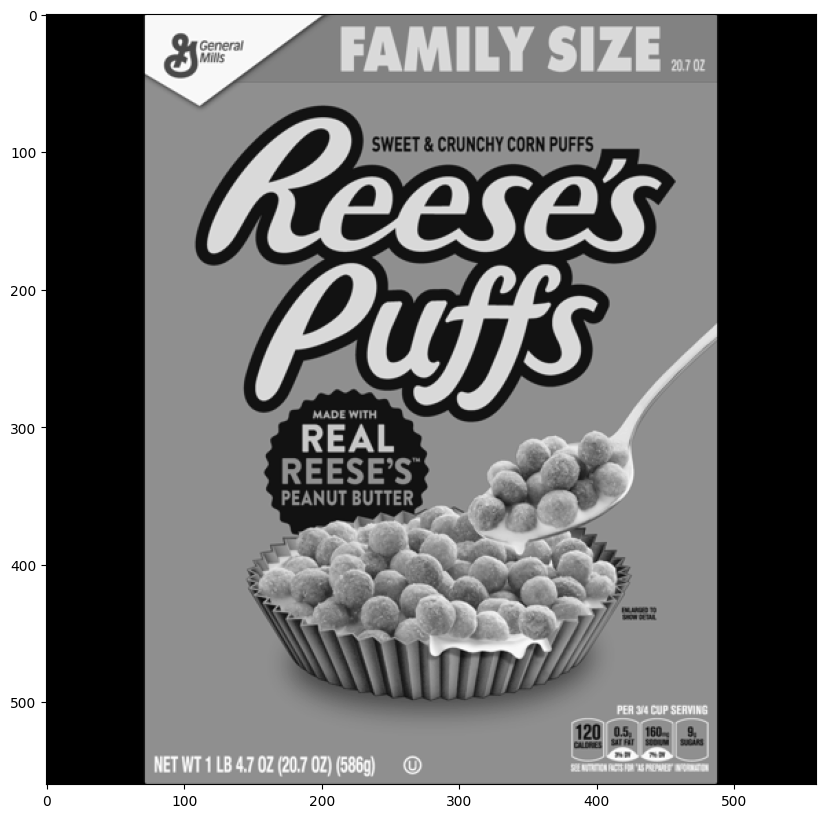

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/reeses_puffs.png',0)
display(reeses)

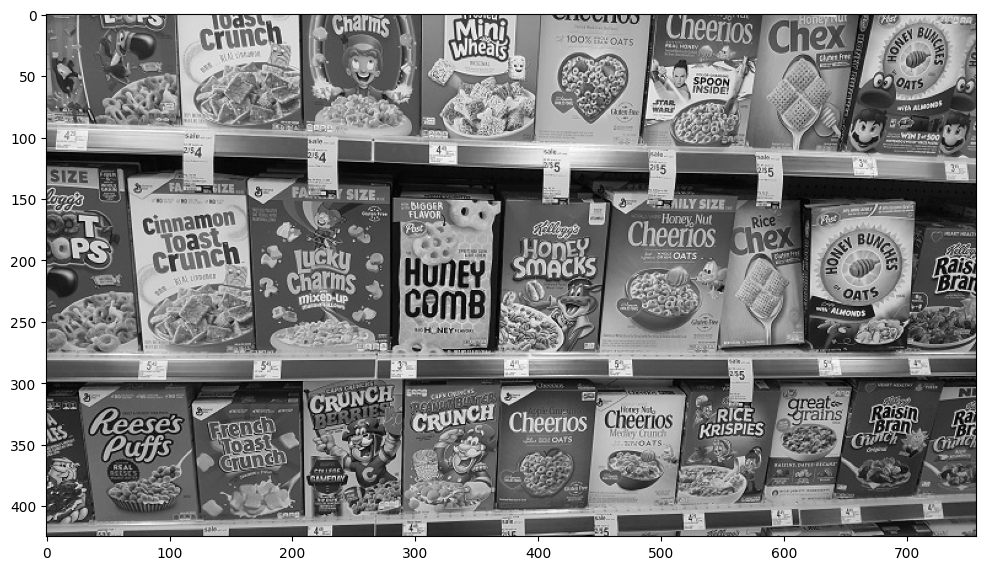

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/many_cereals.jpg',0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

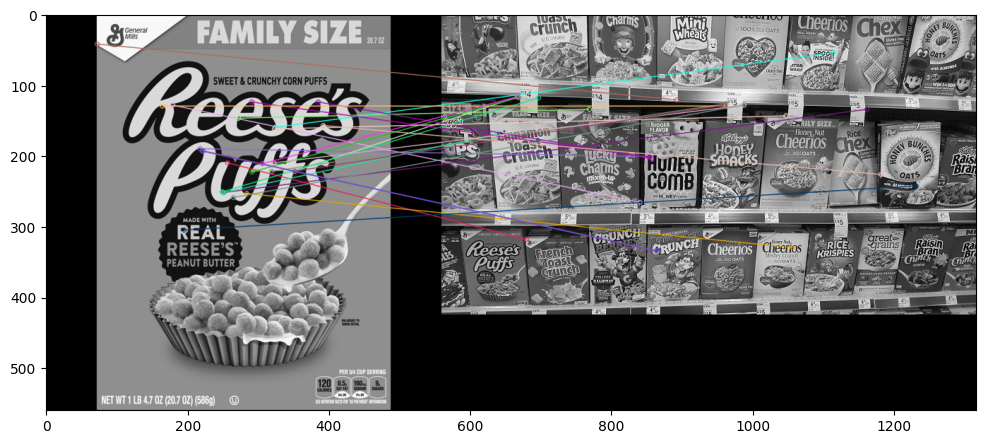

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

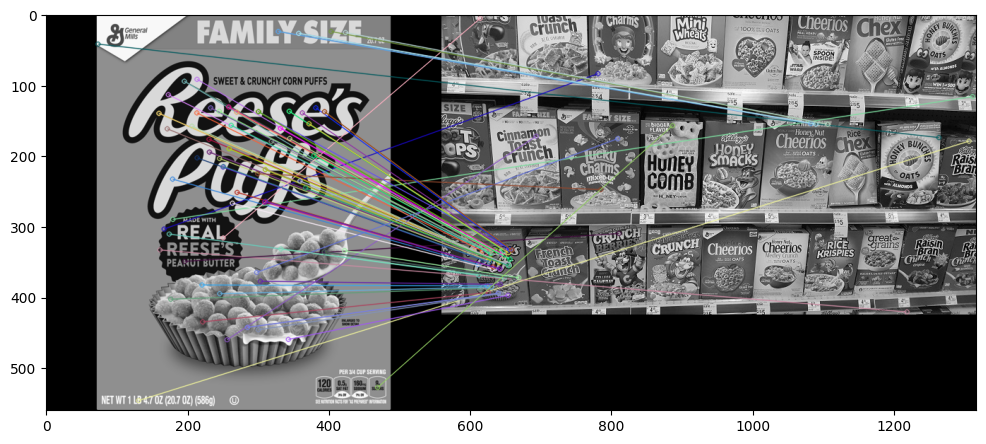

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

### **C.2 Konsep Face Detection**

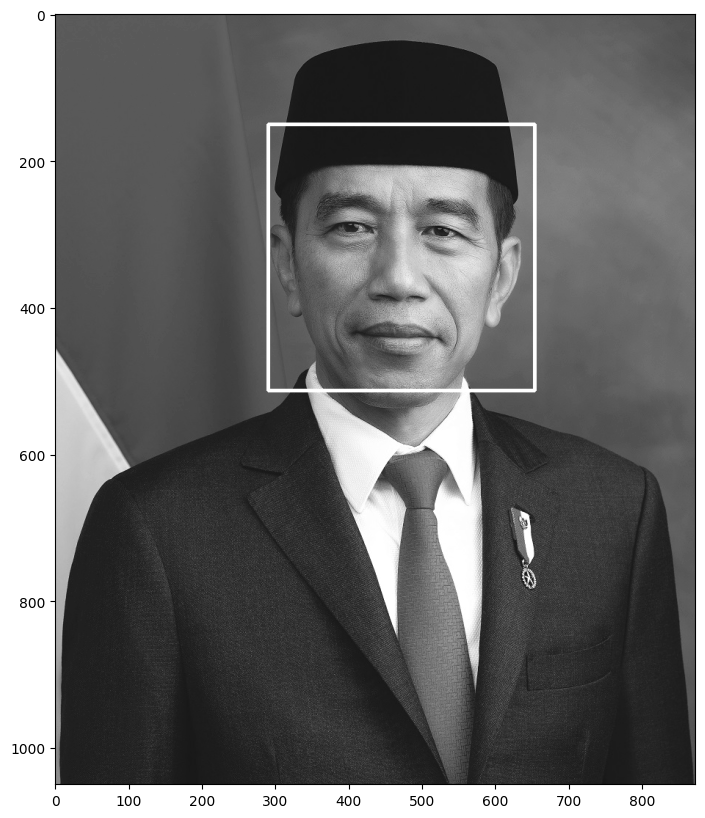

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK_2023/Week12/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w,y+h), (255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

# **D. TUGAS PRAKTIKUM**

**Catatan:** Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:

[Dataset](https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=shari)

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import  beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

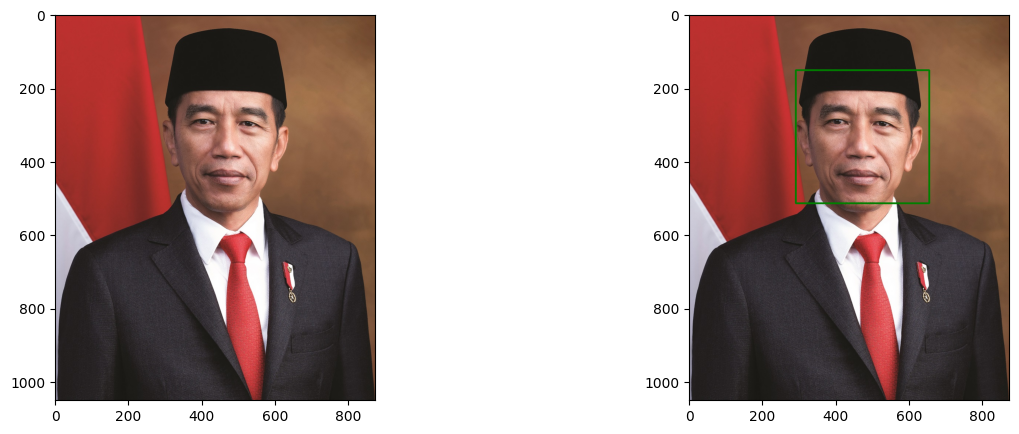

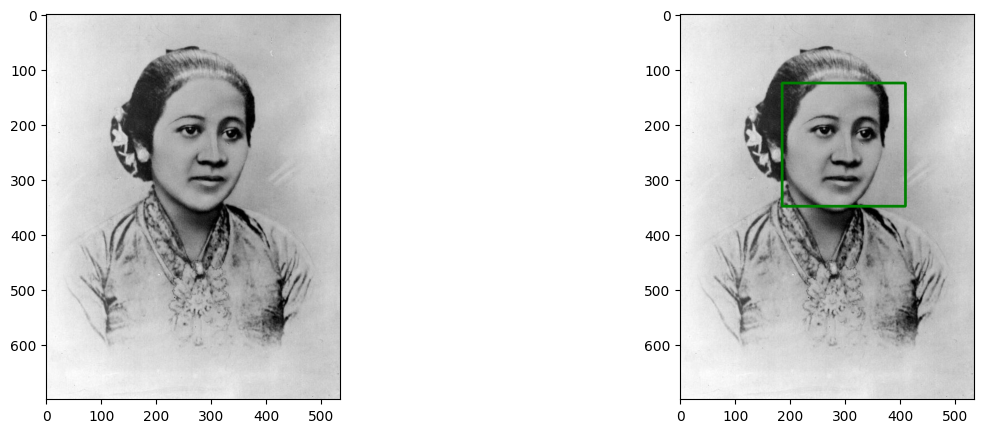

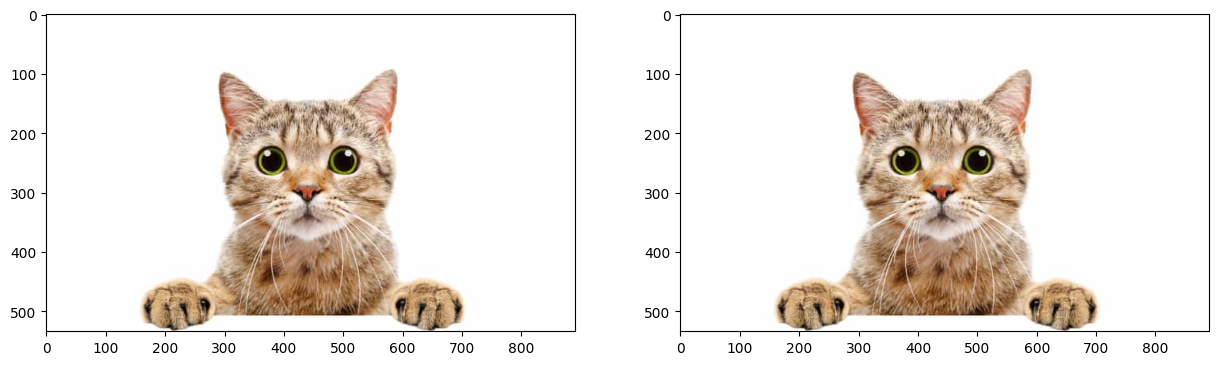

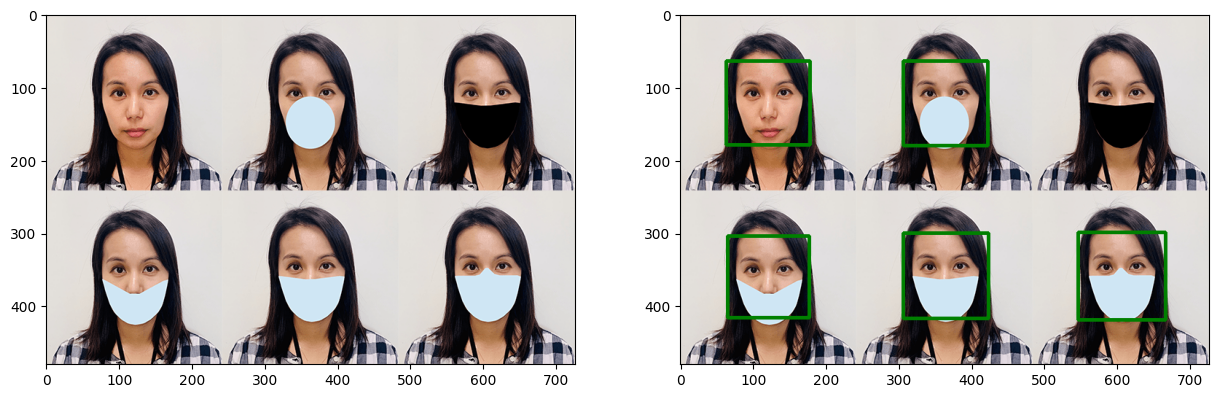

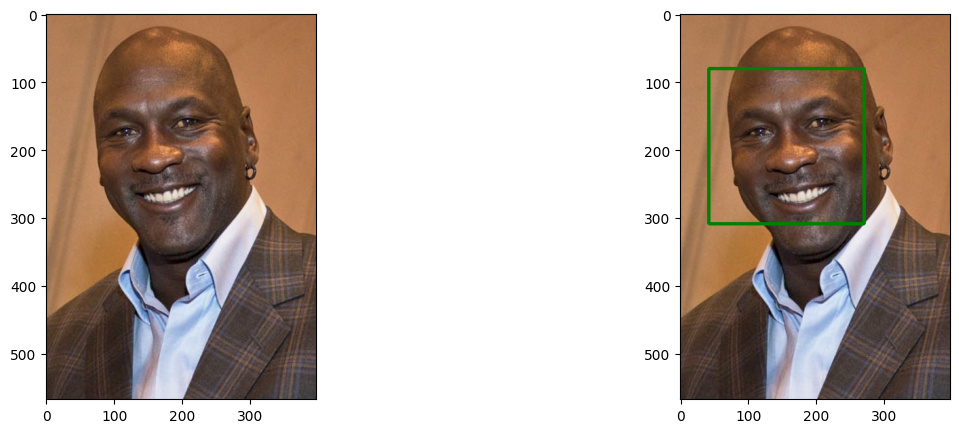

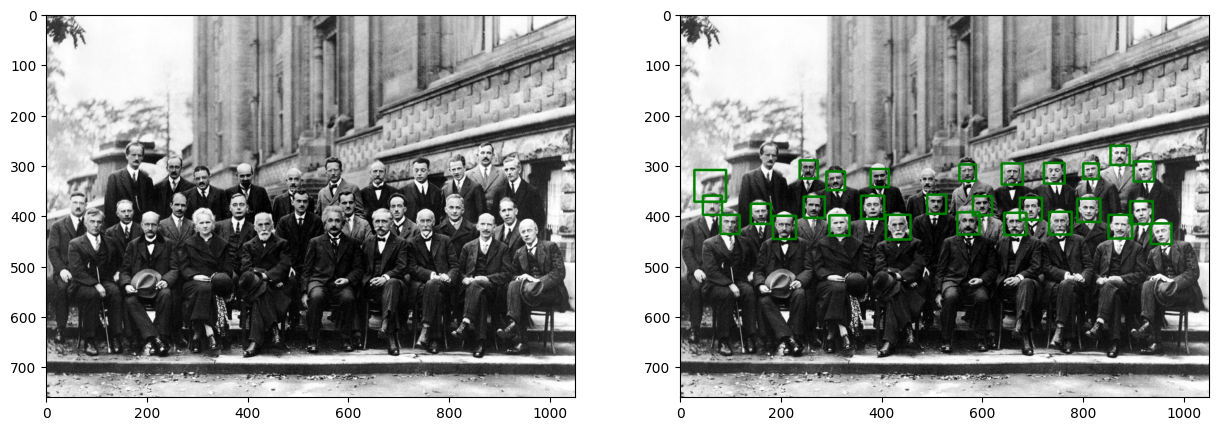

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/jokowi.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/kartini.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/kucing.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/mask.png',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/mjordan.jpg',
        '/content/drive/MyDrive/PCVK_2023/Week12/new/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

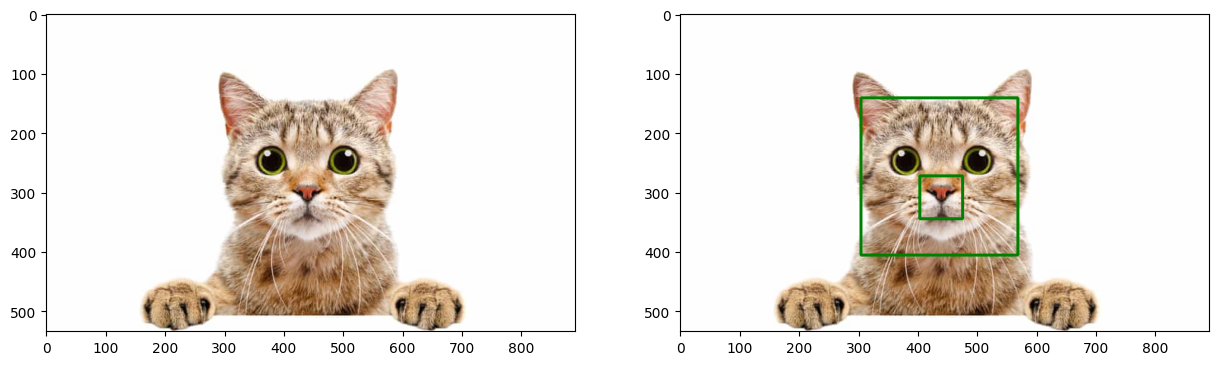

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_frontalcatface_extended.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/kucing.jpg']

for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

4. Cobakan juga untuk eyes detection.

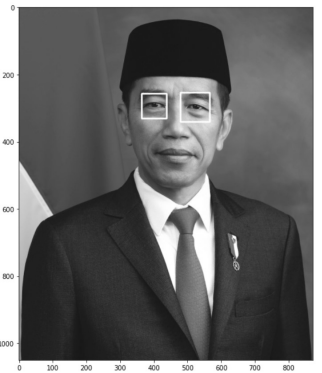

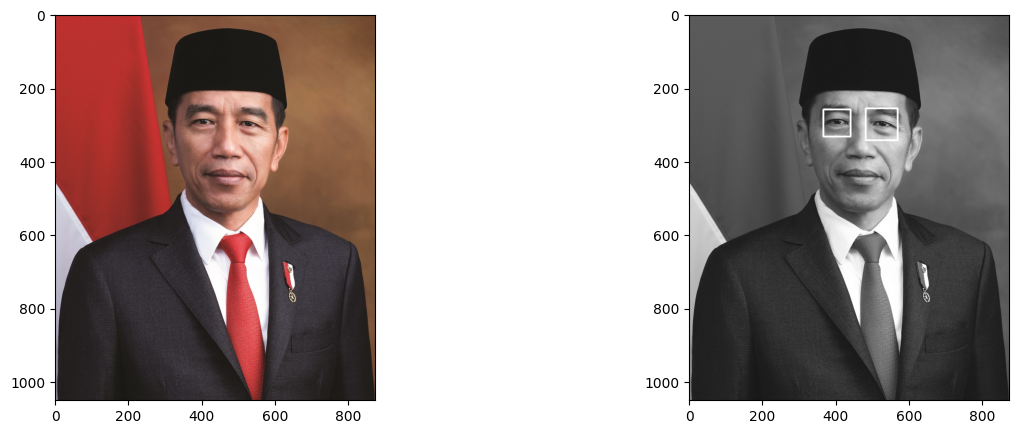

In [16]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_eye.xml')
data = ['/content/drive/MyDrive/PCVK_2023/Week12/new/jokowi.jpg']

for i in data:
  image = cv.imread(i)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


In [60]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [61]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [63]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to endar&bima.jpg


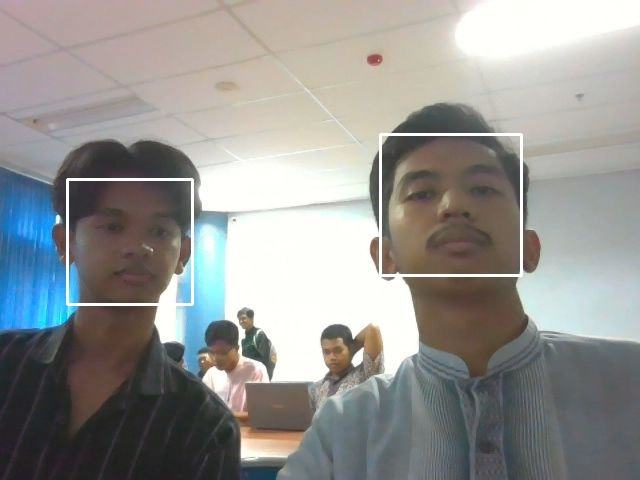

In [64]:
try:
  filename = take_photo('endar&bima.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.

Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

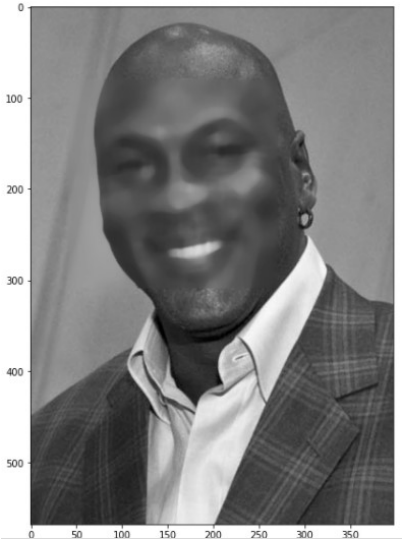

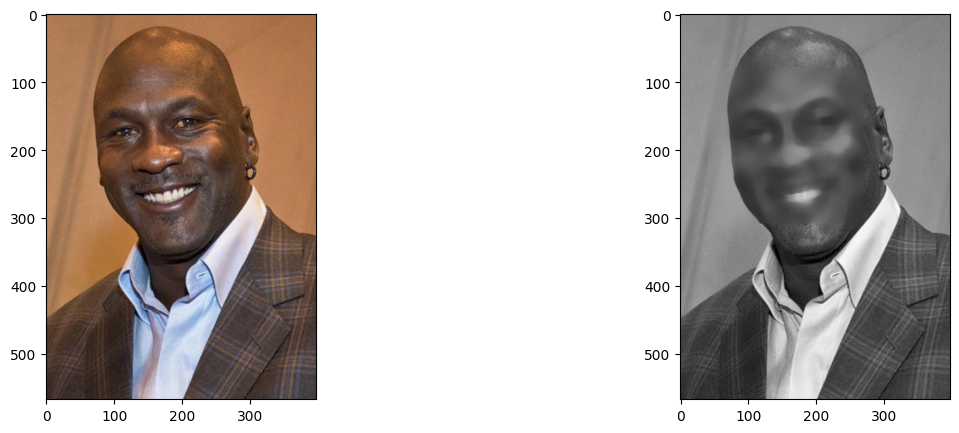

In [44]:
image_path = '/content/drive/MyDrive/PCVK_2023/Week12/new/mjordan.jpg'
cascade_path = '/content/drive/MyDrive/PCVK_2023/Week12/new/haarcascade_frontalface_alt.xml'

def overlay_faces(image_path, cascade_path):

    image = cv.imread(image_path)
    cascade = cv.CascadeClassifier(cascade_path)

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        crop_image = image[y:y+h, x:x+w]
        image_blur = cv.medianBlur(crop_image, 19)
        overlay = cv.resize(image_blur, (w, h))
        image[y:y+h, x:x+w] = overlay[:, :, :3]

    # Display original and processed images
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
    axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cmap='gray')  # Convert to grayscale

overlay_faces(image_path, cascade_path)

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

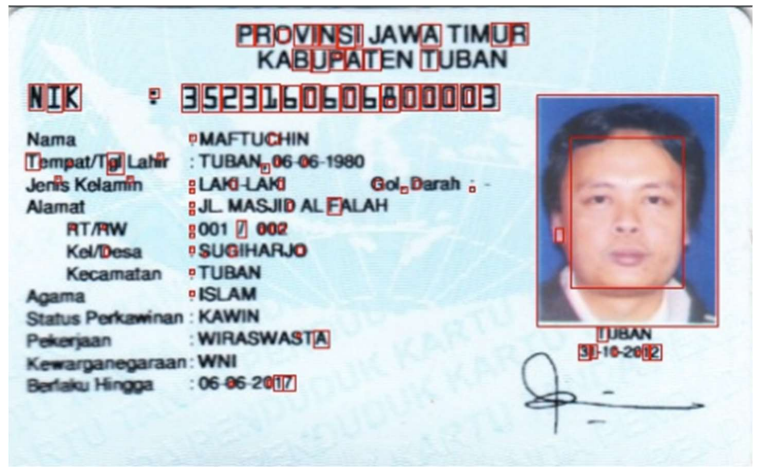

## **Kelompok 2 - KTP Galang Raka Bengkulu**

Anggota Kelompok 2 (TI-3F) :
1. Ahmad Bima Tristan Ibrahim (01 - 2141720077)
2. Alvina Marcy Syakirah Permata (03 - 2141720017)
3. Ananda Galih Pratiwi (05 - 2141720045)
4. Azis Ilham Kurniawan (08 - 2141720145)
5. Muhammad Endar Darmawan (21 - 2141720160)

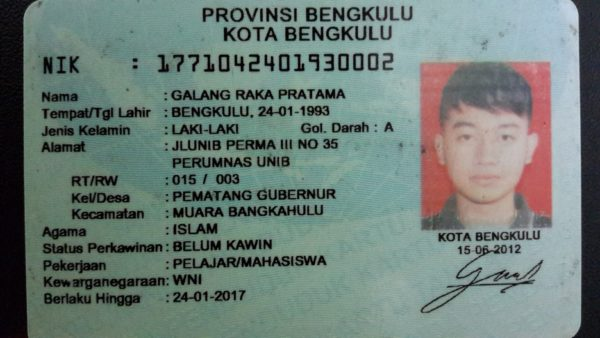

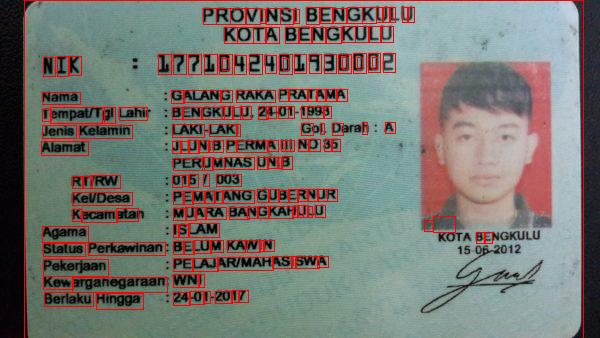

In [46]:
import cv2
from google.colab.patches import cv2_imshow

ktp = cv2.imread('/content/drive/MyDrive/PCVK_2023/KTP/ktp1.png')
blurred = cv2.GaussianBlur(ktp, (5,5), 0.5)
sharpened = cv2.addWeighted(ktp, 1.5, blurred,-0.5,0)

gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if(w>3 and h>10):
    result = cv2.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),1)

cv2_imshow(result)

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

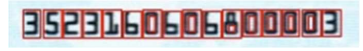

In [54]:
ktp_crop = result[48:78,150:405]
cv2_imshow(ktp_crop)

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.